In [1]:
pip install scikit-surprise

  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl size=758105 sha256=9659322e303a588817e94733cfeffe0b614bc6a4abdf8bc44e326b14df08dcaf
  Stored in directory: /Users/yiqiwang/Library/Caches/pip/wheels/20/91/57/2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [2]:
# import reviews_business_users_final to rbu_data
for line in open('reviews_restaurants_users_final.json', 'r'):
    rbu_data = json.loads(line) 

In [3]:
# create a dataframe of reviews_business_users
df = pd.DataFrame.from_dict(rbu_data, orient='columns')

df = df.drop(columns = ['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', \
                   'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', \
                   'compliment_funny', 'compliment_writer', 'compliment_photos'])

# insert index colum
df['index'] = df.index.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# preview df
pd.set_option('display.max_columns', None)
df.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,b_name,address,city,state,postal_code,latitude,longitude,b_stars,b_review_count,is_open,attributes,categories,hours,u_review_count,yelping_since,u_useful,u_funny,u_cool,elite,fans,average_stars
0,0,ucFOnqgaV40oQ2YNyz5ddQ,JHXQEayrDHOWGexs0dCviA,KXCXaF5qimmtKKqnPc_LQA,1.0,0,0,0,Great coffee and pastries. Baristas are excell...,2018-03-03 23:45:25,Thierry,1059 Alberni Street,Vancouver,BC,V6E 1A1,49.284877,-123.122629,4.0,849,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Food, Desserts, Chocolatiers & Shops, Food Del...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-22:0', '...",70,2009-12-11 18:25:05,118,26,21,,3,2.79
1,1,1OsubwE6zKNU1fkBGxOFrQ,vFnYYmtVwcMGyyGesNImVQ,jMz_y_-cWMfiZF7Q5snE6Q,5.0,0,0,0,Ordered the original tonkotsu base ramen and a...,2016-01-30 02:39:22,Ramen Danbo,1333 Robson Street,Vancouver,BC,V6E 2B1,49.287496,-123.128934,4.5,436,1,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Ramen, Japanese, Noodles, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",68,2013-06-15 04:55:52,34,10,18,,0,3.89
2,2,P320Yt8vFD3yjI34hq-umg,IMfkbLVt_GJfD7zJ9T4fcw,VPqWLp9kMiZEbctCebIZUA,3.0,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50,Medina Cafe,780 Richards Street,Vancouver,BC,V6B 3A4,49.280443,-123.117036,4.0,2302,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Bars, Moroccan, Wine Bars, Breakfast & Brunch,...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-15:0', '...",12,2016-05-16 18:49:40,6,1,1,,0,4.67
3,3,fH8hF8bOFGxITdwuvNQVkw,XK_VJRqf_91vCnZigJGfxw,IYyYpXSsD41g14_z-Zdtiw,5.0,0,0,0,"I found this Thai restaurant at yelp! \nSmall,...",2017-02-19 06:31:42,Kin Kao Thai Kitchen,903 Commercial Drive,Vancouver,BC,V5L,49.276356,-123.069692,4.0,143,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Thai, Restaurants","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",10,2015-05-25 00:56:03,16,7,7,,0,4.70
4,4,XPjCvOzRsoa-5-Dp3SNrjw,fNTuJcjClg4DXI_J_IcQpQ,KW2svfVHffW_FD8oeJo1xQ,1.0,0,0,0,Apparently it's a requirement to have a TERRIB...,2016-07-03 18:40:42,Something Healthy Wholesome Meals & Juice Bar,660 Abbott Street,Vancouver,BC,V6B 6N7,49.279138,-123.107450,3.5,34,0,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...","Sandwiches, Restaurants, Juice Bars & Smoothie...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",3,2016-07-03 18:26:57,6,0,1,,0,2.33


In [4]:
# check data shape
df.shape

(123927, 31)

## Collaborative Filtering (SVD, SVD++, KNNBasic)

In [5]:
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate

In [6]:
# SVD evaluation with 10 folds
from surprise import SVD

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)

algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = 10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.3177  1.3355  1.3171  1.3304  1.3217  1.3182  1.3258  1.3221  1.3269  1.3211  1.3236  0.0057  
MAE (testset)     1.0782  1.1016  1.0792  1.0944  1.0859  1.0792  1.0892  1.0867  1.0879  1.0876  1.0870  0.0069  
Fit time          5.92    6.37    5.87    6.15    5.97    5.85    6.14    6.21    6.21    6.74    6.14    0.25    
Test time         0.36    0.07    0.07    0.08    0.07    0.09    0.37    0.08    0.08    0.11    0.14    0.11    


{'test_rmse': array([1.31766423, 1.33546006, 1.31710106, 1.33044114, 1.32165365,
        1.31824584, 1.32577525, 1.32211849, 1.32691776, 1.32105629]),
 'test_mae': array([1.07820813, 1.1016126 , 1.07920453, 1.09435155, 1.08593063,
        1.07916513, 1.08924783, 1.0866962 , 1.08790762, 1.08763547]),
 'fit_time': (5.919205188751221,
  6.365474700927734,
  5.872891902923584,
  6.147704839706421,
  5.973246335983276,
  5.853815793991089,
  6.143708944320679,
  6.210451126098633,
  6.213345050811768,
  6.738932847976685),
 'test_time': (0.3624532222747803,
  0.07421088218688965,
  0.07397222518920898,
  0.07575798034667969,
  0.07465767860412598,
  0.08782410621643066,
  0.37393784523010254,
  0.07854509353637695,
  0.07889604568481445,
  0.11406087875366211)}

In [7]:
# SVDpp evaluation with 10 folds
from surprise import SVDpp

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)

algo = SVDpp()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = 10, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.3232  1.3356  1.3397  1.3431  1.3431  1.3294  1.3537  1.3290  1.3268  1.3395  1.3363  0.0088  
MAE (testset)     1.0880  1.1001  1.1021  1.1070  1.1098  1.0950  1.1139  1.0947  1.0932  1.1008  1.1005  0.0077  
Fit time          16.42   15.97   16.13   15.62   14.65   15.55   14.60   14.43   14.79   14.55   15.27   0.71    
Test time         0.18    0.20    0.19    0.28    0.18    0.18    0.18    0.18    0.18    0.18    0.19    0.03    


{'test_rmse': array([1.32321247, 1.3355577 , 1.3397113 , 1.34311024, 1.34307695,
        1.32941666, 1.35372923, 1.32904803, 1.32676773, 1.33951103]),
 'test_mae': array([1.08796581, 1.10005558, 1.10213169, 1.10700074, 1.10983711,
        1.09501831, 1.1139128 , 1.09468684, 1.09323916, 1.10084285]),
 'fit_time': (16.420142889022827,
  15.970065832138062,
  16.125529050827026,
  15.619484901428223,
  14.65163278579712,
  15.551721096038818,
  14.6041419506073,
  14.42627215385437,
  14.790251016616821,
  14.551423072814941),
 'test_time': (0.18210816383361816,
  0.20219182968139648,
  0.18609285354614258,
  0.27993130683898926,
  0.17601418495178223,
  0.17992877960205078,
  0.17594289779663086,
  0.17571616172790527,
  0.17876410484313965,
  0.17703676223754883)}

In [8]:
# KNNBasic evaluation with 10 folds
from surprise import KNNBasic

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)

algo = KNNBasic()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = 10, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.4994  1.5152  1.5272  1.5058  1.5165  1.5067  1.5085  1.5011  1.5219  1.503

{'test_rmse': array([1.49942234, 1.51522063, 1.52721695, 1.50581776, 1.51646601,
        1.50673046, 1.5084835 , 1.50108078, 1.52190287, 1.50349155]),
 'test_mae': array([1.22790123, 1.24643867, 1.25242501, 1.23527727, 1.24375982,
        1.23404839, 1.23729518, 1.23209096, 1.24333664, 1.22673976]),
 'fit_time': (178.82511687278748,
  208.43442296981812,
  209.76176476478577,
  212.53469109535217,
  211.9598948955536,
  210.89516282081604,
  206.0956470966339,
  215.54355216026306,
  197.67518281936646,
  199.18890619277954),
 'test_time': (3.4308621883392334,
  3.629401922225952,
  3.054079055786133,
  3.3125672340393066,
  3.3026061058044434,
  2.766103982925415,
  3.56337308883667,
  3.780945062637329,
  3.1056151390075684,
  3.0821070671081543)}

## Content Based Filtering (Cosine Similarity)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Data Pre-processing (Recompute attributes feature and combine with categories feature)

In [10]:
# find attributes key
attributes_key_dic = {}

for i in range(len(df['attributes'])):
    if df['attributes'][i] is not None:
        for key in df['attributes'][i]:
            if key not in attributes_key_dic.keys():
                attributes_key_dic[key] = [df['attributes'][i][key]]
            else:
                if df['attributes'][i][key] not in attributes_key_dic[key]:
                    attributes_key_dic[key].append(df['attributes'][i][key])

tfn_lst = [] # key value is true/fasle/none
text_lst = [] # key value is text
dict_lst = [] # key value is dictionary

for key in attributes_key_dic:
    if len(attributes_key_dic[key]) <= 3 and \
    ('True' in attributes_key_dic[key]):
        tfn_lst.append(key)
    else:
        if len(attributes_key_dic[key][0]) <= 30:
            text_lst.append(key)
        else:
            dict_lst.append(key)
        
print('tfn_lst:', tfn_lst)   
print('text_lst:', text_lst)
print('dict_lst:', dict_lst)

tfn_lst: ['BikeParking', 'DogsAllowed', 'RestaurantsDelivery', 'HasTV', 'OutdoorSeating', 'RestaurantsTakeOut', 'Caters', 'WheelchairAccessible', 'RestaurantsGoodForGroups', 'GoodForKids', 'RestaurantsTableService', 'RestaurantsReservations', 'HappyHour', 'BusinessAcceptsCreditCards', 'Corkage', 'CoatCheck', 'GoodForDancing', 'ByAppointmentOnly', 'BYOB', 'DriveThru']
text_lst: ['RestaurantsPriceRange2', 'WiFi', 'NoiseLevel', 'RestaurantsAttire', 'Alcohol', 'Smoking', 'AcceptsInsurance', 'AgesAllowed']
dict_lst: ['BusinessParking', 'Ambience', 'GoodForMeal', 'BestNights', 'Music', 'DietaryRestrictions', 'HairSpecializesIn']


In [11]:
len(attributes_key_dic) == (len(tfn_lst) + len(text_lst) + len(dict_lst))

True

In [12]:
# check text
text = []
for i in range(len(text_lst)):
    text.append(attributes_key_dic[text_lst[i]])
    
text

[['2', '1', '3', '4', 'None'],
 ["u'free'", "'free'", "u'no'", "'no'", "'paid'", 'None', "u'paid'"],
 ["u'average'",
  "'quiet'",
  "'average'",
  "u'quiet'",
  "u'very_loud'",
  "u'loud'",
  "'loud'",
  "'very_loud'",
  'None'],
 ["u'casual'",
  "'casual'",
  "u'dressy'",
  "'dressy'",
  "'formal'",
  'None',
  "u'formal'"],
 ["u'none'",
  "u'full_bar'",
  "u'beer_and_wine'",
  "'beer_and_wine'",
  "'none'",
  "'full_bar'",
  'None'],
 ["u'no'", "u'outdoor'", 'None', "u'yes'", "'no'"],
 ['False'],
 ["u'19plus'"]]

In [13]:
attributes_text_lst = ['1', '2', '3', '4', 'casual', 'dressy', 'formal', 'full_bar', 'beer_and_wine', 'average', 'quite', 'very_loud', 'loud', 'no',\
'free', 'paid', 'outdoor', 'yes', '19plus', 'allages']

In [14]:
# re-built attributes and store as new_attributes
new_attributes_lst = []
for i in range(len(df)):
    new_attributes = ''
    if df.iloc[i]['attributes'] != None:
        for key in df.iloc[i]['attributes']:
            if key in tfn_lst and (df.iloc[i]['attributes'][key] == 'True'):
                new_attributes = new_attributes + ' ' + key

            elif key in text_lst:
                for j in range(len(attributes_text_lst)):
                    if attributes_text_lst[j] in df.iloc[i]['attributes'][key]:
                        t = key + '_' + attributes_text_lst[j]
                        new_attributes = new_attributes + ' ' + t

            elif key in dict_lst:
                if df.iloc[i]['attributes'][key] != 'None':
                    d = ast.literal_eval(df.iloc[i]['attributes'][key])
                    for d_key in d:
                        if d[d_key] == 'True':
                            new_attributes = new_attributes + ' ' + d_key

        new_attributes_lst.append(new_attributes)
    else:
        new_attributes_lst.append('None')

df['new_attributes'] = new_attributes_lst

In [15]:
# combine two features: new_attributes and categories
features = ['new_attributes', 'categories']
for feature in features:
    df[feature] = df[feature].fillna('')

def combined_features(row):
    return row['categories'] + " " + row['new_attributes']
df["combined_features"] = df.apply(combined_features, axis = 1)

In [16]:
df[['business_id', 'attributes','new_attributes', 'categories', 'combined_features']].head()

,business_id,attributes,new_attributes,categories,combined_features
0,KXCXaF5qimmtKKqnPc_LQA,"{'RestaurantsPriceRange2': '2', 'BikeParking':...",RestaurantsPriceRange2_2 BikeParking WiFi_fre...,"Food, Desserts, Chocolatiers & Shops, Food Del...","Food, Desserts, Chocolatiers & Shops, Food Del..."
1,jMz_y_-cWMfiZF7Q5snE6Q,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...",GoodForKids RestaurantsTableService HasTV Res...,"Ramen, Japanese, Noodles, Restaurants","Ramen, Japanese, Noodles, Restaurants GoodFor..."
2,VPqWLp9kMiZEbctCebIZUA,"{'GoodForKids': 'True', 'RestaurantsPriceRange...",GoodForKids RestaurantsPriceRange2_2 Restaura...,"Bars, Moroccan, Wine Bars, Breakfast & Brunch,...","Bars, Moroccan, Wine Bars, Breakfast & Brunch,..."
3,IYyYpXSsD41g14_z-Zdtiw,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",RestaurantsTakeOut GoodForKids RestaurantsTab...,"Thai, Restaurants","Thai, Restaurants RestaurantsTakeOut GoodForK..."
4,KW2svfVHffW_FD8oeJo1xQ,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...",RestaurantsAttire_casual GoodForKids Alcohol_...,"Sandwiches, Restaurants, Juice Bars & Smoothie...","Sandwiches, Restaurants, Juice Bars & Smoothie..."


### Using Cosine Similarity

In [17]:
business_df = df.drop_duplicates(subset = 'business_id', keep = 'first')
business_df['index'] = range(len(business_df))

cv = CountVectorizer()
count_matrix = cv.fit_transform(business_df["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<ipython-input-17-01b5ea0be087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_df['index'] = range(len(business_df))


In [18]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.36514837, 0.25819889, ..., 0.26516504, 0.63960215,
        0.63245553],
       [0.36514837, 1.        , 0.42426407, ..., 0.32274861, 0.46709937,
        0.57735027],
       [0.25819889, 0.42426407, 1.        , ..., 0.27386128, 0.33028913,
        0.36742346],
       ...,
       [0.26516504, 0.32274861, 0.27386128, ..., 1.        , 0.22613351,
        0.4472136 ],
       [0.63960215, 0.46709937, 0.33028913, ..., 0.22613351, 1.        ,
        0.80903983],
       [0.63245553, 0.57735027, 0.36742346, ..., 0.4472136 , 0.80903983,
        1.        ]])

In [19]:
len(cosine_sim[0])

3879

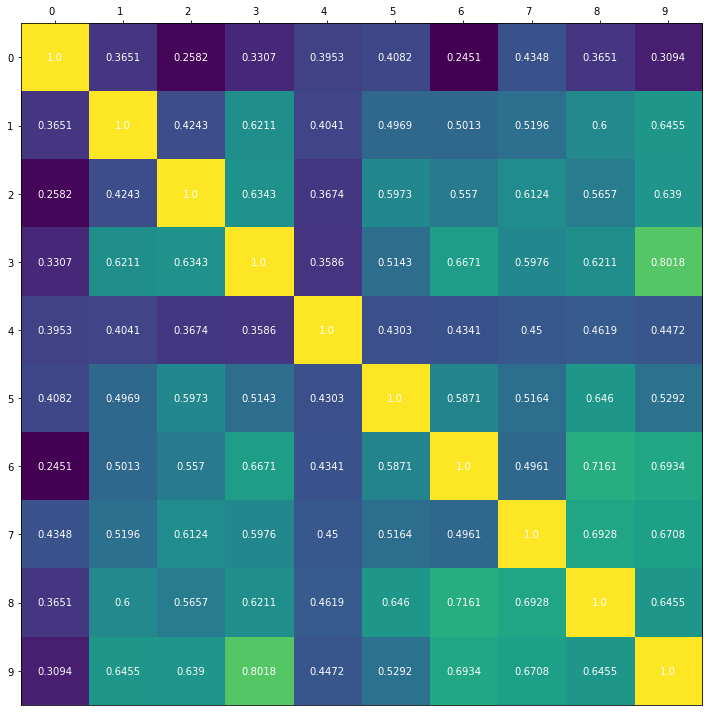

In [20]:
# plot sample heatmap of first 10 restaurants
column = row = list(range(10))

sample_cs = np.array([cosine_sim[i][:10] for i in range(10)])
formatted_sample_cs = np.around(sample_cs, 4) # format the float to 4 decimal places

fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(formatted_sample_cs)

# We want to show all ticks...
ax.set_xticks(np.arange(len(row)))
ax.set_yticks(np.arange(len(column)))
# ... and label them with the respective list entries
ax.set_xticklabels(row)
ax.set_yticklabels(column)

ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(column)):
    for j in range(len(row)):
        text = ax.text(j, i, formatted_sample_cs[i, j], ha="center", va="center", color="w")

#ax.set_title("sample of cosine_similarity", fontsize = 15)
fig.tight_layout()
plt.show()

In [21]:
formatted_sample_cs

array([[1.    , 0.3651, 0.2582, 0.3307, 0.3953, 0.4082, 0.2451, 0.4348,
        0.3651, 0.3094],
       [0.3651, 1.    , 0.4243, 0.6211, 0.4041, 0.4969, 0.5013, 0.5196,
        0.6   , 0.6455],
       [0.2582, 0.4243, 1.    , 0.6343, 0.3674, 0.5973, 0.557 , 0.6124,
        0.5657, 0.639 ],
       [0.3307, 0.6211, 0.6343, 1.    , 0.3586, 0.5143, 0.6671, 0.5976,
        0.6211, 0.8018],
       [0.3953, 0.4041, 0.3674, 0.3586, 1.    , 0.4303, 0.4341, 0.45  ,
        0.4619, 0.4472],
       [0.4082, 0.4969, 0.5973, 0.5143, 0.4303, 1.    , 0.5871, 0.5164,
        0.646 , 0.5292],
       [0.2451, 0.5013, 0.557 , 0.6671, 0.4341, 0.5871, 1.    , 0.4961,
        0.7161, 0.6934],
       [0.4348, 0.5196, 0.6124, 0.5976, 0.45  , 0.5164, 0.4961, 1.    ,
        0.6928, 0.6708],
       [0.3651, 0.6   , 0.5657, 0.6211, 0.4619, 0.646 , 0.7161, 0.6928,
        1.    , 0.6455],
       [0.3094, 0.6455, 0.639 , 0.8018, 0.4472, 0.5292, 0.6934, 0.6708,
        0.6455, 1.    ]])

### Content User likes

In [22]:
# example of restaurant "Medina Cafe", business_id:VPqWLp9kMiZEbctCebIZUA
restaurants_user_likes = 'VPqWLp9kMiZEbctCebIZUA'

def get_index_from_id(b_id):
    return business_df[business_df.business_id == b_id]["index"].values[0]

restaurants_index = get_index_from_id(restaurants_user_likes)
similar_restaurants = list(enumerate(cosine_sim[restaurants_index]))
sorted_similar_restaurants = sorted(similar_restaurants, key=lambda x:x[1], reverse=True)

# get the top 3 restaurants which are similar to the "Medina Cafe"
def get_id_from_index(index):
    return df[df.index == index]["business_id"].values[0]

def get_name_from_index(index):
    return df[df.index == index]["b_name"].values[0]

print('---------------------------------')
print('The 5 Most Similar Restaurants: ')
i = 0
for restaurants in sorted_similar_restaurants:
    print("Restaurant %d is %s" % (i, get_name_from_index(restaurants[0])))
    #print("business id is:", get_id_from_index(restaurants[0]))
    i = i + 1
    if i > 5:
        break

---------------------------------
The 5 Most Similar Restaurants: 
Restaurant 0 is Medina Cafe
Restaurant 1 is BookKyung Ban Jeoum Korean
Restaurant 2 is Sushi By Yuji
Restaurant 3 is The Butcher & Bullock
Restaurant 4 is Sushi California
Restaurant 5 is Yolks


In [23]:
similar_restaurants[:10]

[(0, 0.25819888974716104),
 (1, 0.42426406871192845),
 (2, 0.9999999999999998),
 (3, 0.6343350474165466),
 (4, 0.36742346141747667),
 (5, 0.5973191135873606),
 (6, 0.5570066518960167),
 (7, 0.6123724356957945),
 (8, 0.5656854249492379),
 (9, 0.6390096504226939)]

In [24]:
sorted_similar_restaurants[:10]

[(2, 0.9999999999999998),
 (3666, 0.7999999999999998),
 (764, 0.7666666666666665),
 (1302, 0.7627700713964733),
 (3277, 0.7519206177414045),
 (441, 0.7453559924999299),
 (1367, 0.7453559924999299),
 (3620, 0.7348469228349533),
 (3681, 0.7348469228349533),
 (1128, 0.73156352095029)]

### Calculating MAE & RMSE

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [26]:
# get the top 3 restaurants' cosine value
b_id_lst = list(df.business_id.unique())
similarity_dict = {}

for i in range(len(b_id_lst)):
    restaurants_index = get_index_from_id(b_id_lst[i])
    similar_restaurants = list(enumerate(cosine_sim[restaurants_index]))
    sorted_similar_restaurants = sorted(similar_restaurants, key=lambda x:x[1], reverse=True)
    sim_lst = []
    
    for j in range(1, 4):
        sim_lst.append(sorted_similar_restaurants[j][1])
    similarity_dict[b_id_lst[i]] = sim_lst

In [27]:
len(similarity_dict) == len(b_id_lst)

True

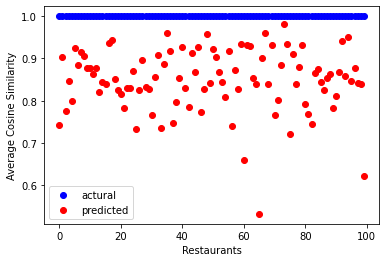

In [28]:
# r is actual value which the similarity is 1
# p is predicted value which is the average similarity value of the top 3 restaurant
r = np.array([1] * len(similarity_dict))
p = np.array([None] * len(similarity_dict))
sim_lst = list(similarity_dict.values())

for i in range(len(sim_lst)):
    p[i] = np.mean(sim_lst[i])
    
# sample plot the first 100 values
x = list(range(100))

plt.scatter(x, r[:100], color="blue", label="actural")
plt.scatter(x, p[:100], color="red", label="predicted")
plt.xlabel("Restaurants", fontsize = 10)
plt.ylabel("Average Cosine Similarity", fontsize = 10)
plt.legend()
plt.show() 

In [29]:
# make 10 Fold and randomly split into train and test set
kf = KFold(n_splits = 10)
mae_lst = []
rmse_lst = []

for train_index, test_index in kf.split(p):
    p_train, p_test = p[train_index], p[test_index]
    
    # calculate the mae and rmse of p_test value and the actual value (1)
    r = np.array([1] * len(p_test))
    mae_lst.append(mean_absolute_error(r, p_test))
    rmse_lst.append(mean_squared_error(r, p_test, squared = False))

print("MAE:", mae_lst)
print("RMSE:", rmse_lst)

avg_mae = np.mean(mae_lst)
avt_rmse = np.mean(rmse_lst)
std_mae = np.std(mae_lst)
std_rmse = np.std(rmse_lst)

print("The Average MAE:", avg_mae)
print("The Average RMSE:", avt_rmse)
print("The Std MAE:", std_mae)
print("The Std RMSE:", std_rmse)

MAE: [0.16779845988931388, 0.15824525378465962, 0.16905388807547425, 0.1561200722782019, 0.16897172453023576, 0.16510753231212225, 0.16206519901040042, 0.15917166209193048, 0.17704942901122095, 0.1667499321023943]
RMSE: [0.18834815244015, 0.178221355350427, 0.187235488434906, 0.17549684321019726, 0.18709633706267537, 0.1850574691534755, 0.18603499935567874, 0.1796992277724003, 0.19737179478310382, 0.1857513402352452]
The Average MAE: 0.16503331530859539
The Average RMSE: 0.18503130077982594
The Std MAE: 0.005961155428116107
The Std RMSE: 0.005827957688050685


## Weighted Hybrid Filtering

In [30]:
cb_predict_score = {}

for b_id in similarity_dict:
    cb_predict_score[b_id] = np.mean(similarity_dict[b_id])

In [31]:
cb_predict_score

{'KXCXaF5qimmtKKqnPc_LQA': 0.742456497986628,
 'jMz_y_-cWMfiZF7Q5snE6Q': 0.9023775226658676,
 'VPqWLp9kMiZEbctCebIZUA': 0.7764789126877133,
 'IYyYpXSsD41g14_z-Zdtiw': 0.8471779311667157,
 'KW2svfVHffW_FD8oeJo1xQ': 0.7982590144749238,
 'D1hjyNLXAedgtzYgPNVn8g': 0.9255616860887416,
 '_HNYnhhzudNvEnvGvHo6XQ': 0.8845595640167754,
 '2GynEdoTt2S8uem1GyQF5w': 0.9147638123830065,
 '1dx5YJhbhZmljv11oRyu2Q': 0.9067543858018013,
 'EvVCF3mompCg3PPkpqip2A': 0.8777944271711382,
 'X1FtX-e5J88mCXz7nDw1ZA': 0.8778471936302953,
 '-kXshDNDij_QARV4wR4EjQ': 0.8626710632579276,
 'MELmrubCowx8e3G68WTqgQ': 0.8784000999695079,
 '8_Luerj7LEVuSb5ll_7hlg': 0.8203834673133686,
 'NensKn1MSVU_rm-1Y6WlFA': 0.8452447753791418,
 'BXiqPvvF0Tp84K8dr9gh1w': 0.8390015155943104,
 '6T0ceMqSLXHyLtsJLlEGbg': 0.9371948233631953,
 'b8hOuhfKH_NSacq22pw8Sg': 0.9442528165819875,
 '8XLNTHnXfnPsCz3s6K1HCQ': 0.8515738685591616,
 'XgI16hjVMKx7fjiBjSqEcQ': 0.824624895875722,
 'bJKqZi70hu8g_ctZAAxtJw': 0.8161460911989962,
 '6iOAgzJ0DRZNS

In [32]:
from surprise import SVD
cf_predict_score = {}
b_p_score = {b_id : [] for b_id in df.business_id.unique()}

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)
algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)

for i in range(len(df)):
    uid = df.iloc[i]['user_id']
    iid = df.iloc[i]['business_id']
    rui = df.iloc[i]['stars']
    
    pred = algo.predict(uid, iid, r_ui = rui)
    
    b_p_score[iid].append(pred.est)

for b_id in b_p_score:
    cf_predict_score[b_id] = np.mean(b_p_score[b_id])

In [33]:
cf_predict_score

{'KXCXaF5qimmtKKqnPc_LQA': 4.065486548890223,
 'jMz_y_-cWMfiZF7Q5snE6Q': 4.352276085182955,
 'VPqWLp9kMiZEbctCebIZUA': 4.301371208263771,
 'IYyYpXSsD41g14_z-Zdtiw': 3.921536463165921,
 'KW2svfVHffW_FD8oeJo1xQ': 2.890105380080801,
 'D1hjyNLXAedgtzYgPNVn8g': 1.9600223336793174,
 '_HNYnhhzudNvEnvGvHo6XQ': 3.4100346041594354,
 '2GynEdoTt2S8uem1GyQF5w': 2.7350915506821067,
 '1dx5YJhbhZmljv11oRyu2Q': 3.0760396123373885,
 'EvVCF3mompCg3PPkpqip2A': 3.718484925064295,
 'X1FtX-e5J88mCXz7nDw1ZA': 3.0721238080494744,
 '-kXshDNDij_QARV4wR4EjQ': 3.333722815171015,
 'MELmrubCowx8e3G68WTqgQ': 4.418155239985165,
 '8_Luerj7LEVuSb5ll_7hlg': 4.060307563445886,
 'NensKn1MSVU_rm-1Y6WlFA': 4.011894597507097,
 'BXiqPvvF0Tp84K8dr9gh1w': 3.5185764589890764,
 '6T0ceMqSLXHyLtsJLlEGbg': 3.6550619717980997,
 'b8hOuhfKH_NSacq22pw8Sg': 3.598479568234605,
 '8XLNTHnXfnPsCz3s6K1HCQ': 3.6145742555453384,
 'XgI16hjVMKx7fjiBjSqEcQ': 3.4664266579356653,
 'bJKqZi70hu8g_ctZAAxtJw': 3.702257693584303,
 '6iOAgzJ0DRZNSKA3FSrrOg'

In [34]:
cf_real_score = {} #business average rating
b_r_score = {b_id : [] for b_id in df.business_id.unique()}

for i in range(len(df)):
    b_r_score[df.iloc[i]['business_id']].append(df.iloc[i]['stars'])
    
for b_id in b_r_score:
    cf_real_score[b_id] = np.mean(b_r_score[b_id])

In [35]:
cf_real_score

{'KXCXaF5qimmtKKqnPc_LQA': 4.085245901639344,
 'jMz_y_-cWMfiZF7Q5snE6Q': 4.313807531380753,
 'VPqWLp9kMiZEbctCebIZUA': 4.238987816307404,
 'IYyYpXSsD41g14_z-Zdtiw': 3.9310344827586206,
 'KW2svfVHffW_FD8oeJo1xQ': 2.6363636363636362,
 'D1hjyNLXAedgtzYgPNVn8g': 1.935483870967742,
 '_HNYnhhzudNvEnvGvHo6XQ': 3.0,
 '2GynEdoTt2S8uem1GyQF5w': 2.717948717948718,
 '1dx5YJhbhZmljv11oRyu2Q': 3.0588235294117645,
 'EvVCF3mompCg3PPkpqip2A': 3.719298245614035,
 'X1FtX-e5J88mCXz7nDw1ZA': 2.888888888888889,
 '-kXshDNDij_QARV4wR4EjQ': 3.3043478260869565,
 'MELmrubCowx8e3G68WTqgQ': 4.410029498525073,
 '8_Luerj7LEVuSb5ll_7hlg': 4.073170731707317,
 'NensKn1MSVU_rm-1Y6WlFA': 4.018518518518518,
 'BXiqPvvF0Tp84K8dr9gh1w': 3.525,
 '6T0ceMqSLXHyLtsJLlEGbg': 3.6705882352941175,
 'b8hOuhfKH_NSacq22pw8Sg': 3.5892857142857144,
 '8XLNTHnXfnPsCz3s6K1HCQ': 3.608695652173913,
 'XgI16hjVMKx7fjiBjSqEcQ': 3.4615384615384617,
 'bJKqZi70hu8g_ctZAAxtJw': 3.7044334975369457,
 '6iOAgzJ0DRZNSKA3FSrrOg': 4.109523809523809,
 'H6hl

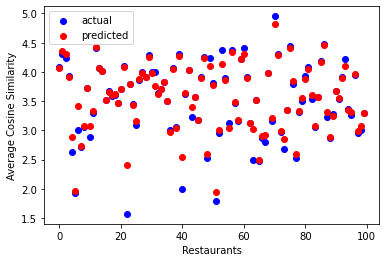

MAE: [0.1991930003983382, 0.18882837029367958, 0.223553487247949, 0.1722727526299517, 0.19826703425077405, 0.18788021087919074, 0.21007501472446852, 0.20875032119597653, 0.22784775040937286, 0.24214185089167495]
RMSE: [0.3787188306126879, 0.3475553199910617, 0.40218374509615396, 0.3230179552477697, 0.378762623223017, 0.35093759984934053, 0.3759329101948208, 0.414551983159273, 0.44088498188523256, 0.44034138767560616]
The Average MAE: 0.20588097929213758
The Average RMSE: 0.38528873369349637
The Std MAE: 0.019956361625698797
The Std RMSE: 0.037307187826236245


In [36]:
# r is actual value 
# p is predicted value 
r = np.array([None] * len(cf_real_score))
p = np.array([None] * len(cf_predict_score))

i = 0
for b_id in cf_real_score:
    r[i] = cf_real_score[b_id]
    p[i] = cf_predict_score[b_id]
    i += 1
    
# sample plot the first 100 values
x = list(range(100))

plt.scatter(x, r[:100], color="blue", label="actual")
plt.scatter(x, p[:100], color="red", label="predicted")
plt.xlabel("Restaurants", fontsize = 10)
plt.ylabel("Average Cosine Similarity", fontsize = 10)

plt.legend()
plt.show() 

# make 10 Fold and randomly split into train and test set
kf = KFold(n_splits = 10)
cf_mae_lst = []
cf_rmse_lst = []

for train_index, test_index in kf.split(p):
    r_train, r_test = r[train_index], r[test_index]
    p_train, p_test = p[train_index], p[test_index]
    
    
    cf_mae_lst.append(mean_absolute_error(r_test, p_test))
    cf_rmse_lst.append(mean_squared_error(r_test, p_test, squared = False))

print("MAE:", cf_mae_lst)
print("RMSE:", cf_rmse_lst)

avg_cf_mae = np.mean(cf_mae_lst)
avg_cf_rmse = np.mean(cf_rmse_lst)
std_cf_mae = np.std(cf_mae_lst)
std_cf_rmse = np.std(cf_rmse_lst)

print("The Average MAE:", avg_cf_mae)
print("The Average RMSE:", avg_cf_rmse)
print("The Std MAE:", std_cf_mae)
print("The Std RMSE:", std_cf_rmse)

In [38]:
len(cb_predict_score) == len(cf_predict_score)

True

In [39]:
# beta1 = beta2 = 0.5
equal_weighted_pscore = {}
equal_weighted_rscore = {}

for b_id in cf_predict_score:
    equal_weighted_pscore[b_id] = 0.5 * cf_predict_score[b_id] + 0.5 * cb_predict_score[b_id]
    

for b_id in cf_real_score:
    equal_weighted_rscore[b_id] = 0.5 * cf_real_score[b_id] + 0.5 * 1

In [40]:
len(equal_weighted_pscore) == len(equal_weighted_rscore)

True

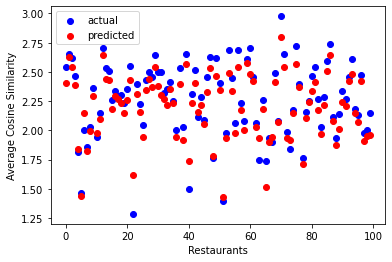

In [41]:
# r is actual value 
# p is predicted value 
r = np.array([None] * len(equal_weighted_rscore))
p = np.array([None] * len(equal_weighted_pscore))

i = 0
for b_id in equal_weighted_rscore:
    r[i] = equal_weighted_rscore[b_id]
    p[i] = equal_weighted_pscore[b_id]
    i += 1
    
# sample plot the first 100 values
x = list(range(100))

plt.scatter(x, r[:100], color="blue", label="actual")
plt.scatter(x, p[:100], color="red", label="predicted")
plt.xlabel("Restaurants", fontsize = 10)
plt.ylabel("Average Cosine Similarity", fontsize = 10)
plt.legend()
plt.show() 

In [42]:
# make 10 Fold and randomly split into train and test set
kf = KFold(n_splits = 10)
wh_mae_lst = []
wh_rmse_lst = []

for train_index, test_index in kf.split(p):
    r_train, r_test = r[train_index], r[test_index]
    p_train, p_test = p[train_index], p[test_index]
    
    
    wh_mae_lst.append(mean_absolute_error(r_test, p_test))
    wh_rmse_lst.append(mean_squared_error(r_test, p_test, squared = False))

print("MAE:", wh_mae_lst)
print("RMSE:", wh_rmse_lst)

avg_wh_mae = np.mean(wh_mae_lst)
avg_wh_rmse = np.mean(wh_rmse_lst)
std_wh_mae = np.std(wh_mae_lst)
std_wh_rmse = np.std(wh_rmse_lst)

print("The Average MAE:", avg_wh_mae)
print("The Average RMSE:", avg_wh_rmse)
print("The Std MAE:", std_wh_mae)
print("The Std RMSE:", std_wh_rmse)

MAE: [0.14065237312259515, 0.1284867721225847, 0.14651548274918275, 0.12478531254094752, 0.13605566557045115, 0.1261165811324446, 0.13837692380375743, 0.14253468676547518, 0.15618061238139547, 0.15866713922846523]
RMSE: [0.20452284233002646, 0.1819192865833694, 0.21118240100810137, 0.1743921445210835, 0.19681758170012398, 0.18065821817453112, 0.1938315813814387, 0.2145122621208636, 0.22845791564815152, 0.22664307335366515]
The Average MAE: 0.13983715494172994
The Average RMSE: 0.20129373068213546
The Std MAE: 0.011109876068362647
The Std RMSE: 0.01806663509194963


# Calculate Time Efficiency

In [43]:
import time

## content-based

In [44]:
time0 = time.time()
b_id_lst = list(df.business_id.unique())
similarity_dict = {}

cv = CountVectorizer()
count_matrix = cv.fit_transform(business_df["combined_features"])
cosine_sim = cosine_similarity(count_matrix)

def get_index_from_id(b_id):
    return business_df[business_df.business_id == b_id]["index"].values[0]

for i in range(len(b_id_lst)):
    restaurants_index = get_index_from_id(b_id_lst[i])
    similar_restaurants = list(enumerate(cosine_sim[restaurants_index]))
    sorted_similar_restaurants = sorted(similar_restaurants, key=lambda x:x[1], reverse=True)
    sim_lst = []
    
    for j in range(1, 4):
        sim_lst.append(sorted_similar_restaurants[j][1])
    similarity_dict[b_id_lst[i]] = sim_lst


r = np.array([1] * len(similarity_dict))
p = np.array([None] * len(similarity_dict))
sim_lst = list(similarity_dict.values())

for i in range(len(sim_lst)):
    p[i] = np.mean(sim_lst[i])

print("training time:", round(time.time()-time0, 3), "s")
time1 = time.time()    

# make 10 Fold and randomly split into train and test set
kf = KFold(n_splits = 10)
mae_lst = []
rmse_lst = []

for train_index, test_index in kf.split(p):
    p_train, p_test = p[train_index], p[test_index]
    
    # calculate the mae and rmse of p_test value and the actual value (1)
    r = np.array([1] * len(p_test))
    mae_lst.append(mean_absolute_error(r, p_test))
    rmse_lst.append(mean_squared_error(r, p_test, squared = False))

print("MAE:", mae_lst)
print("RMSE:", rmse_lst)

avg_mae = np.mean(mae_lst)
avt_rmse = np.mean(rmse_lst)
std_mae = np.std(mae_lst)
std_rmse = np.std(rmse_lst)

print("The Average MAE:", avg_mae)
print("The Average RMSE:", avt_rmse)
print("The Std MAE:", std_mae)
print("The Std RMSE:", std_rmse)

print("test time:", (time.time()-time1), "s")

training time: 13.742 s
MAE: [0.16779845988931388, 0.15824525378465962, 0.16905388807547425, 0.1561200722782019, 0.16897172453023576, 0.16510753231212225, 0.16206519901040042, 0.15917166209193048, 0.17704942901122095, 0.1667499321023943]
RMSE: [0.18834815244015, 0.178221355350427, 0.187235488434906, 0.17549684321019726, 0.18709633706267537, 0.1850574691534755, 0.18603499935567874, 0.1796992277724003, 0.19737179478310382, 0.1857513402352452]
The Average MAE: 0.16503331530859539
The Average RMSE: 0.18503130077982594
The Std MAE: 0.005961155428116107
The Std RMSE: 0.005827957688050685
test time: 0.006569862365722656 s


## weighted hybrid

In [45]:
t0 = time.time()
cb_predict_score = {}

for b_id in similarity_dict:
    cb_predict_score[b_id] = np.mean(similarity_dict[b_id])
    

cf_predict_score = {}
b_p_score = {b_id : [] for b_id in df.business_id.unique()}

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['user_id', 'business_id', 'stars']], reader)
algo = SVD()
trainset = data.build_full_trainset()

algo.fit(trainset)


for i in range(len(df)):
    uid = df.iloc[i]['user_id']
    iid = df.iloc[i]['business_id']
    rui = df.iloc[i]['stars']
    
    pred = algo.predict(uid, iid, r_ui = rui)
    
    b_p_score[iid].append(pred.est)

for b_id in b_p_score:
    cf_predict_score[b_id] = np.mean(b_p_score[b_id])
    

cf_real_score = {} #business average rating
b_r_score = {b_id : [] for b_id in df.business_id.unique()}

for i in range(len(df)):
    b_r_score[df.iloc[i]['business_id']].append(df.iloc[i]['stars'])
    
for b_id in b_r_score:
    cf_real_score[b_id] = np.mean(b_r_score[b_id])
    
# beta1 = beta2 = 0.5
equal_weighted_pscore = {}
equal_weighted_rscore = {}

for b_id in cf_predict_score:
    equal_weighted_pscore[b_id] = 0.5 * cf_predict_score[b_id] + 0.5 * cb_predict_score[b_id]
    

for b_id in cf_real_score:
    equal_weighted_rscore[b_id] = 0.5 * cf_real_score[b_id] + 0.5 * 1

print("training time:", round(time.time()-t0, 3), "s")
r = np.array([None] * len(equal_weighted_rscore))
p = np.array([None] * len(equal_weighted_pscore))

i = 0
for b_id in equal_weighted_rscore:
    r[i] = equal_weighted_rscore[b_id]
    p[i] = equal_weighted_pscore[b_id]
    i += 1
    

t1 = time.time()

# make 10 Fold and randomly split into train and test set
kf = KFold(n_splits = 10)
wh_mae_lst = []
wh_rmse_lst = []

for train_index, test_index in kf.split(p):
    r_train, r_test = r[train_index], r[test_index]
    p_train, p_test = p[train_index], p[test_index]
    
    
    wh_mae_lst.append(mean_absolute_error(r_test, p_test))
    wh_rmse_lst.append(mean_squared_error(r_test, p_test, squared = False))

print("MAE:", wh_mae_lst)
print("RMSE:", wh_rmse_lst)

avg_wh_mae = np.mean(wh_mae_lst)
avg_wh_rmse = np.mean(wh_rmse_lst)
std_wh_mae = np.std(wh_mae_lst)
std_wh_rmse = np.std(wh_rmse_lst)

print("The Average MAE:", avg_wh_mae)
print("The Average RMSE:", avg_wh_rmse)
print("The Std MAE:", std_wh_mae)
print("The Std RMSE:", std_wh_rmse)

print("test time:", (time.time()-t1), "s")

training time: 85.682 s
MAE: [0.1396616675945723, 0.1296384180008708, 0.14589893106950058, 0.12492944812926475, 0.13539421272635843, 0.12590833247065208, 0.13786196841026427, 0.14133043035014464, 0.15683211967782254, 0.15964781882582074]
RMSE: [0.20208040878621447, 0.18493007806613143, 0.2107048711422537, 0.17476278540578802, 0.19439825903303393, 0.17971228835856176, 0.19296759727370524, 0.21032975639832538, 0.22869004806244386, 0.22734419936391007]
The Average MAE: 0.13971033472552713
The Average RMSE: 0.2005920291890368
The Std MAE: 0.011242968218864424
The Std RMSE: 0.01774652170536461
test time: 0.006803035736083984 s
